In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORTING LIBRARIES

In [ ]:
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPool2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.callbacks import EarlyStopping ,CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from math import ceil
import pandas as pd
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn as sk
import keras
from tensorflow.keras import datasets, layers, models
%matplotlib inline

# DATA LOADING AND PREPROCESSING

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

def load_data_from_csv(csv_file, image_size):
    df = pd.read_csv(csv_file)

    # Initialize lists to store data and labels
    data = []
    labels = []

    image_width, image_height, num_channels = image_size

    # Iterate through the rows of the DataFrame
    for index, row in df.iterrows():
        image_path = row['path']
        class_index = row['class_index']

        # Load and preprocess the image
        image = cv2.imread(image_path)  
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
        image = image / 255.0
        image = image.astype(np.float32)

        # Append the image data and label to the lists
        data.append(image)
        labels.append([class_index])

    # Convert lists to numpy arrays
    data_array = np.array(data)
    label_array = np.array(labels)

    return data_array, label_array

csv_file = '/content/drive/MyDrive/1 WCEBleedGen Challenge/NewClassification.csv'
image_size = (224, 224, 3)  
data, labels = load_data_from_csv(csv_file, image_size)

Label for the 2nd image: [1]


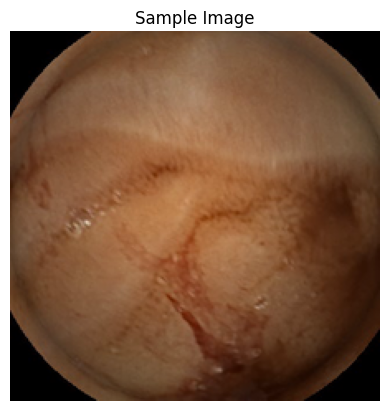

In [ ]:
x, y = load_data_from_csv(csv_file, (224, 224,3))
print("Label for the 2nd image:", y[1])
# Display the 2nd image
plt.imshow(x[1])
plt.axis('off')
plt.title('Sample Image')
plt.show()

# SPLITTING OF DATA 

In [ ]:
def split_data(test_size=0.2 , log=True):
    x_train, x_test_val, y_train, y_test_val = train_test_split(x, y, test_size=test_size,shuffle=True)
    if log==True :
        print('Input Shape : ')
        print(x_train.shape,(y_train).shape)
        print(x_test_val.shape,(y_test_val).shape)
    x_test=x_test_val
    x_val=x_test_val
    y_test=y_test_val
    y_val=y_test_val


    x_train=x_train.reshape(-1,224,224,3)
    x_test=x_test.reshape(-1,224,224,3)
    x_val=x_val.reshape(-1,224,224,3)
    if log==True :
        print('Output Shape : ')
        print(x_train.shape,y_train.shape)
        print(x_test.shape,y_test.shape)
        print(x_val.shape,y_val.shape)
    return x_train, x_test, y_train, y_test,x_val,y_val
x_train, x_test, y_train, y_test,x_val,y_val=split_data()
validation_dataset=(x_val,y_val)


Input Shape : 
(2094, 224, 224, 3) (2094, 1)
(524, 224, 224, 3) (524, 1)
Output Shape : 
(2094, 224, 224, 3) (2094, 1)
(524, 224, 224, 3) (524, 1)
(524, 224, 224, 3) (524, 1)


# BUILD CNN MODEL

In [ ]:
def Build_Model(input_shape=(224,224,3)):
    Model = keras.models.Sequential([
            Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=input_shape),
            Conv2D(32,kernel_size=(3,3),activation='relu'),
            MaxPool2D(2,2),
            Conv2D(32,kernel_size=(3,3),activation='relu'),
            Conv2D(32,kernel_size=(3,3),activation='relu'),
            Conv2D(64,kernel_size=(3,3),activation='relu'),
            MaxPool2D(4,4),
            Flatten() ,
            Dense(64,activation='relu') ,
            Dense(32,activation='relu') ,
            Dense(16,activation='relu'),
            Dropout(rate=0.5) ,
            Dense(1,activation='sigmoid') ,
            ])
    return Model

In [ ]:
Model=Build_Model()
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 104, 104, 64)      18496     
                                                        

In [ ]:
Model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
def make_callbacks(csv_path='my_class_log_5.csv'):
    early_stop=EarlyStopping(monitor='val_loss',patience=8,mode='min',restore_best_weights=False)
    csv_logger=CSVLogger(csv_path)
    callbacks =[early_stop,csv_logger]
    return callbacks
callbacks=make_callbacks()

# TRAINING OF MODEL

In [ ]:
epochs = 30
Model.fit(x_train, y_train, epochs=epochs,batch_size=32,verbose=1,callbacks=callbacks,validation_data=validation_dataset)

Epoch 1/30
66/66 [==============================] - 7s 94ms/step - loss: 0.0498 - accuracy: 0.9857 - val_loss: 0.0466 - val_accuracy: 0.9809
Epoch 2/30
66/66 [==============================] - 5s 80ms/step - loss: 0.0262 - accuracy: 0.9957 - val_loss: 0.0775 - val_accuracy: 0.9866
Epoch 3/30
66/66 [==============================] - 5s 80ms/step - loss: 0.0451 - accuracy: 0.9890 - val_loss: 0.0828 - val_accuracy: 0.9847
Epoch 4/30
66/66 [==============================] - 6s 84ms/step - loss: 0.0415 - accuracy: 0.9924 - val_loss: 0.0642 - val_accuracy: 0.9847
Epoch 5/30
66/66 [==============================] - 5s 81ms/step - loss: 0.0394 - accuracy: 0.9938 - val_loss: 0.1741 - val_accuracy: 0.9618
Epoch 6/30
66/66 [==============================] - 5s 78ms/step - loss: 0.1383 - accuracy: 0.9718 - val_loss: 0.1535 - val_accuracy: 0.9351
Epoch 7/30
66/66 [==============================] - 5s 82ms/step - loss: 0.0617 - accuracy: 0.9799 - val_loss: 0.0478 - val_accuracy: 0.9847
Epoch 8/30
66

In [ ]:
Model.save('Bleeding & Non-Bleeding classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
Model = load_model('Bleeding & Non-Bleeding classification.h5')

In [ ]:
Model_loss, Model_accuracy = Model.evaluate(x_test, y_test)

print(f"it is Model accuracy: {Model_accuracy}")
print(f'it is Model loss: {Model_loss}')

17/17 [==============================] - 1s 28ms/step - loss: 0.0626 - accuracy: 0.9847
it is Model accuracy: 0.9847328066825867
it is Model loss: 0.06264343112707138


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

def predict_on_custome_image(img_path, img_or_directory=False, save_csv=False, csv_filename="predictions.csv"):
    results = []  # List to store results (image name and predicted class)

    if img_or_directory == False:
        array = cv2.imread(img_path)
        y_predict = Model.predict(array.reshape(1, *array.shape))
        y_predict_res = predict_human_readable(y_predict)

        if y_predict_res == 1:
            predicted = 'Bleeding Detected'
        else:
            predicted = 'No Bleeding'

        results.append((os.path.basename(img_path), predicted))
    else:
        all_img = os.listdir(img_path)

        for path in all_img:
            lst_1 = path.split('.')
            if lst_1[1] in ['jpg', 'png', 'jpeg']:
                array = cv2.imread(os.path.join(img_path, path))
                y_predict = Model.predict(array.reshape(1, *array.shape))
                y_predict_res = predict_human_readable(y_predict)

                if y_predict_res == 1:
                    predicted = 'Bleeding Detected'
                else:
                    predicted = 'No Bleeding'

                results.append((path, predicted))

    # Create a DataFrame from the results
    df = pd.DataFrame(results, columns=["Image Name", "Predicted Class"])

    # Save the DataFrame as a CSV file if save_csv is True
    if save_csv:
        df.to_csv(csv_filename, index=False)

    return df

predictions_df1 = predict_on_custome_image('/content/drive/MyDrive/1 WCEBleedGen Challenge/Testing set/Test Dataset 1', img_or_directory=True, save_csv=True, csv_filename="predictions1.csv")
predictions_df2 = predict_on_custome_image('/content/drive/MyDrive/1 WCEBleedGen Challenge/Testing set/Test Dataset 2', img_or_directory=True, save_csv=True, csv_filename="predictions2.csv")

print(predictions_df2)


1/1 [==============================] - 0s 22ms/step
    Image Name    Predicted Class
0    A0053.png        No Bleeding
1    A0052.png  Bleeding Detected
2    A0059.png        No Bleeding
3    A0057.png        No Bleeding
4    A0058.png        No Bleeding
..         ...                ...
510  A0561.png        No Bleeding
511  A0556.png        No Bleeding
512  A0560.png        No Bleeding
513  A0559.png        No Bleeding
514  A0557.png        No Bleeding

[515 rows x 2 columns]


# PLOTTING ACCURACY

In [ ]:
csv=pd.read_csv('my_class_log_5.csv')
accuracy=csv['accuracy']
loss=csv['loss']
val_accuracy=csv['val_accuracy']
val_loss=csv['val_loss']
print(csv[['loss','val_loss','accuracy','val_accuracy']])

       loss  val_loss  accuracy  val_accuracy
0  0.049829  0.046628  0.985673      0.980916
1  0.026231  0.077499  0.995702      0.986641
2  0.045103  0.082785  0.989016      0.984733
3  0.041459  0.064183  0.992359      0.984733
4  0.039393  0.174051  0.993792      0.961832
5  0.138266  0.153494  0.971824      0.935115
6  0.061697  0.047812  0.979943      0.984733
7  0.028674  0.133778  0.992359      0.975191
8  0.024290  0.062643  0.993792      0.984733


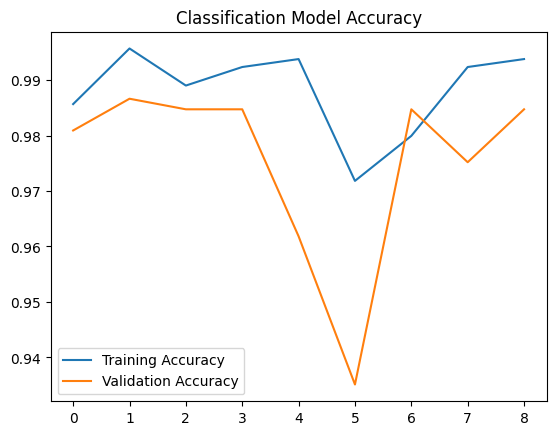

In [ ]:
plt.plot(accuracy,label='Training Accuracy')
plt.plot(val_accuracy,label='Validation Accuracy')
plt.legend()
plt.title('Classification Model Accuracy')
plt.show()

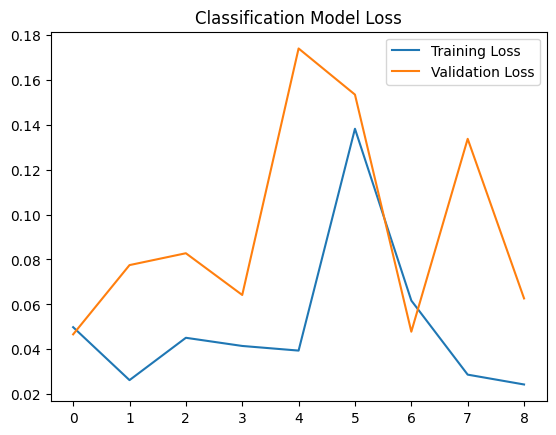

In [ ]:

plt.plot(loss,label='Training Loss',)
plt.plot(val_loss,label='Validation Loss')

plt.legend()
plt.title('Classification Model Loss')
plt.show()